<a href="https://colab.research.google.com/github/palanivigneshwar/Anomaly-detection-for-cloud-system-using-support-vector-machine/blob/master/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys, os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sys.path.append(os.path.abspath("../"))
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gs 
import datetime
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
%matplotlib inline

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [22]:
link='https://drive.google.com/open?id=1thnZ11PxwemRP84tFHjci3n1gNf1tSYl'
fluff, id = link.split('=')
print (id)

1thnZ11PxwemRP84tFHjci3n1gNf1tSYl


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('20 Percent Training Set.csv')

In [0]:
col=["duration", "protocol_type", "service", "flag", "src_bytes","dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins","logged_in", "num_compromised", "root_shell", "su_attempted", "num_root","num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds","is_host_login", "is_guest_login", "count", "srv_count", "serror_rate","srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate","diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate","dst_host_rerror_rate", "dst_host_srv_rerror_rate", "labels"]
att={'normal': 'normal','back': 'DDoS','land': 'DDoS','neptune': 'DDoS','pod': 'DDoS','smurf': 'DDoS','teardrop': 'DDoS','mailbomb': 'DDoS','apache2': 'DDoS','processtable': 'DDoS','udpstorm': 'DDoS','ipsweep': 'Probe','nmap': 'Probe','portsweep': 'Probe','satan': 'Probe','mscan': 'Probe','saint': 'Probe','ftp_write': 'R2L','guess_passwd': 'R2L','imap': 'R2L','multihop': 'R2L','phf': 'R2L','spy': 'R2L','warezclient': 'R2L','warezmaster': 'R2L','sendmail': 'R2L','named': 'R2L','snmpgetattack': 'R2L','snmpguess': 'R2L','xlock': 'R2L','xsnoop': 'R2L','worm': 'R2L','buffer_overflow': 'U2R','loadmodule': 'U2R','perl': 'U2R','rootkit': 'U2R','httptunnel': 'U2R','ps': 'U2R','sqlattack': 'U2R','xterm': 'U2R'}

In [0]:
plt.style.use('ggplot')
class linsvm(object):
    def __init__(self):
        self.clas1 = None
        self.clas2 = None
        self.clas3 = None
        self.clas4 = None
        self.train = []
        self.test = []
        self.trainset=[]
        self.bin_labels=[]
    @staticmethod
    def load_data(filepath):
        index = [26,25,4,12,39,30,38,6,5,29,11,22,37,35,8,14,10,34,31,33,27,23]
        dataset = pd.read_csv(filepath, names=col, index_col=False)
        dataset = dataset.sample(frac=1).reset_index(drop=True)
        labels = dataset['labels']
        dataset = dataset.iloc[:, index]
        nomin = [0]
        for num in nomin:
            dataset.iloc[:, num] = dataset.iloc[:, num].astype('category')
            dataset.iloc[:, num] = dataset.iloc[:, num].cat.codes
        scaler = MinMaxScaler(feature_range=(-1,1))
        dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
        return [dataset, labels]

    def load_train_data(self, filepath):
        self.train = self.load_data(filepath)

    def load_test_data(self, filepath):
        self.test = self.load_data(filepath)

    def train_clas(self):
        self.train_set, train_labels = self.train
        self.bin_labels = train_labels.apply(lambda x: x if x == 'normal' else 'anomaly')
        X_train,X_test,y_train,y_test=train_test_split(self.train_set,self.bin_labels,test_size=0.2,random_state=0)
        X=[]
        currentDT = datetime.datetime.now()
        print (str(currentDT))
        self.clas1 = SVC(C=3.0,gamma="auto")
        self.clas1.fit(X_train, y_train)
        prediction1=self.clas1.predict(X_test)
        print("Accuracy: {}%".format(self.clas1.score(X_test, y_test) * 100 ))
        X.append(self.clas1.score(X_test, y_test) * 100)
        currentDT = datetime.datetime.now()
        print (str(currentDT))
        self.clas2 = SVC(kernel='linear')
        self.clas2.fit(X_train, y_train)
        prediction2=self.clas2.predict(X_test)
        print("Accuracy: {}%".format(self.clas2.score(X_test, y_test) * 100 ))
        X.append(self.clas2.score(X_test, y_test) * 100)
        currentDT = datetime.datetime.now()
        print (str(currentDT))
        self.clas3 = RandomForestClassifier(random_state=0)
        self.clas3.fit(X_train, y_train)
        prediction3=self.clas3.predict(X_test)
        print("Accuracy: {}%".format(self.clas3.score(X_test, y_test) * 100 ))
        X.append(self.clas3.score(X_test, y_test) * 100)
        currentDT = datetime.datetime.now()
        print (str(currentDT))
        self.clas4 = LogisticRegression(random_state=0)
        self.clas4.fit(X_train, y_train)
        prediction4=self.clas4.predict(X_test)
        print("Accuracy: {}%".format(self.clas4.score(X_test, y_test) * 100 ))
        X.append(self.clas4.score(X_test, y_test) * 100)
        currentDT = datetime.datetime.now()
        print (str(currentDT))
        self.clas5 = KNeighborsRegressor(n_neighbors=5)
        self.clas5.fit(X_train, y_train)
        prediction5=self.clas4.predict(X_test)
        print("Accuracy: {}%".format(accuracy_score(y_test, prediction5) * 100 ))
        X.append(accuracy_score(y_test, prediction5) * 100)
        currentDT = datetime.datetime.now()
        print (str(currentDT))
        freq_series = pd.Series.from_array(X)
        plt.figure(figsize=(12, 8))
        ax = freq_series.plot(kind='bar')
        ax.set_title('Bar Graph')
        ax.set_xlabel('Accuracy')
        ax.set_ylabel('Frequency')
        ax.set_xticklabels(X)
        rects = ax.patches
        labels = ["RBF SVM","Linear SVM","Random Forest","Logistic Regression","K Nearest Neighbour"]

        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                    ha='center', va='bottom')

In [26]:
mytr=linsvm()
mytr.load_train_data('20 Percent Training Set.csv')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


2019-04-08 19:16:32.450751
Accuracy: 96.58662433022425%
2019-04-08 19:16:37.507592
Accuracy: 93.74875967453859%
2019-04-08 19:16:43.900113
Accuracy: 99.44433419329232%
2019-04-08 19:16:44.098615


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 93.09386783091882%
2019-04-08 19:16:44.403931
Accuracy: 93.09386783091882%
2019-04-08 19:16:45.173337


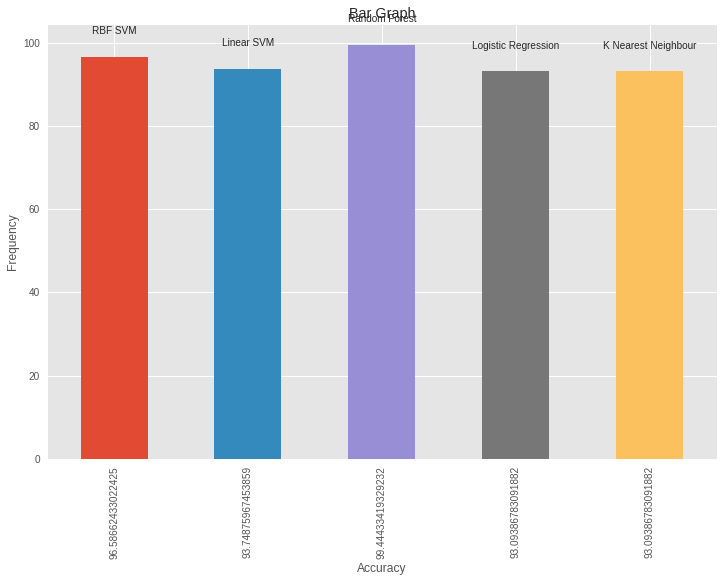

In [27]:
mytr.train_clas()